In [1]:
import sys
sys.path.insert(1, '../')
from genesis import *

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\pyfolio\pos.py:26: UserWarning: Module "zipline.assets" not found; mutltipliers will not be applied to position notionals.
  warnings.warn(


In [2]:
universe = G10_FX + ASIA_FX
total_returns = total_returns_usd[universe]
spot_returns = spot_returns_usd[universe]
carry_returns = carry_returns_usd[universe]

# Settings

In [3]:
settings = Settings(start_date = "2000-01-01", end_date = "2016-12-31", notional = 100, implementation_lag = 1,
             asset_scaling_method="simple", asset_scaling_target=0.1, asset_scaling_width=126, rebalance_period="daily",
             sector_scaling_method="simple", sector_scaling_target=0.1, sector_scaling_width=126,
             portfolio_scaling_method="simple", portfolio_scaling_target=0.1, portfolio_scaling_width=252)

In [4]:
ctv_bt = pickle.load(open("../BT/carry_tovol_all_daily.p", "rb"))
ss_unwind_bt = pickle.load(open("../BT/carry_unwinding_all_daily.p", "rb"))
cs_unwind_bt = pickle.load(open("../BT/carry_unwinding_credit_daily.p", "rb"))
fsb_bt = pickle.load(open("../BT/bp_skew_all_daily.p", "rb"))
rx_bt = pickle.load(open("../BT/rx_skew_all.p", "rb"))
sgv_bt = pickle.load(open("../BT/value_sgneer_all_daily.p", "rb"))

# Vis

In [5]:
bt_list = [ctv_bt, ss_unwind_bt, cs_unwind_bt, fsb_bt, rx_bt, sgv_bt]
bt_names = ["ctv", "ss", "cs", "fsb", "rx", "sgv"]

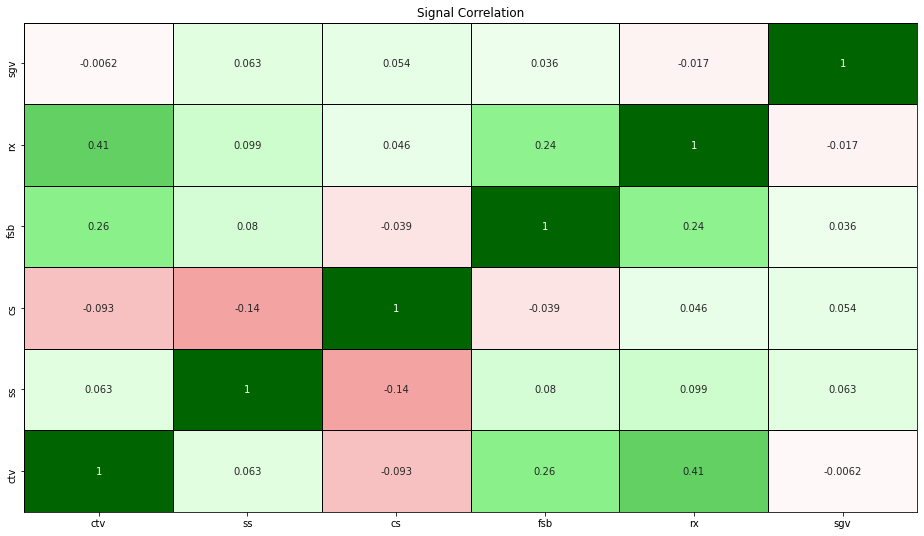

In [6]:
cbt_corrplot(bt_list, bt_names)

<AxesSubplot:title={'center':'Rolling 1Y Correlation'}, xlabel='Dates', ylabel='Correlation'>

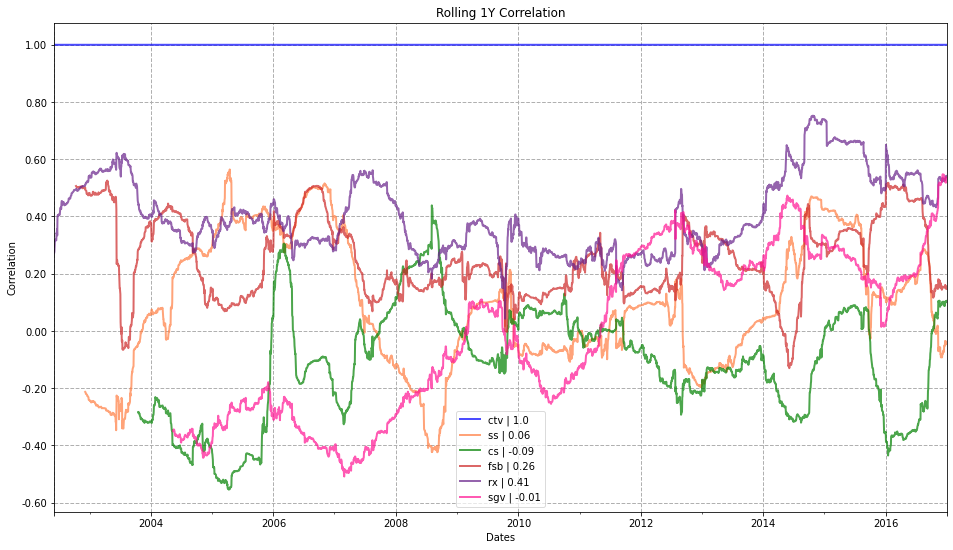

In [7]:
cbt_rolling_cor(bt_list, bt_names, window=252, main="Rolling 1Y Correlation")

In [8]:
[dollar_sharpe(x.model_rtn) for x in bt_list]

[0.8344214499240729,
 0.6080084430091162,
 0.5284665430286553,
 0.3925420550944568,
 0.5877462429859702,
 0.863844119830715]

ctv


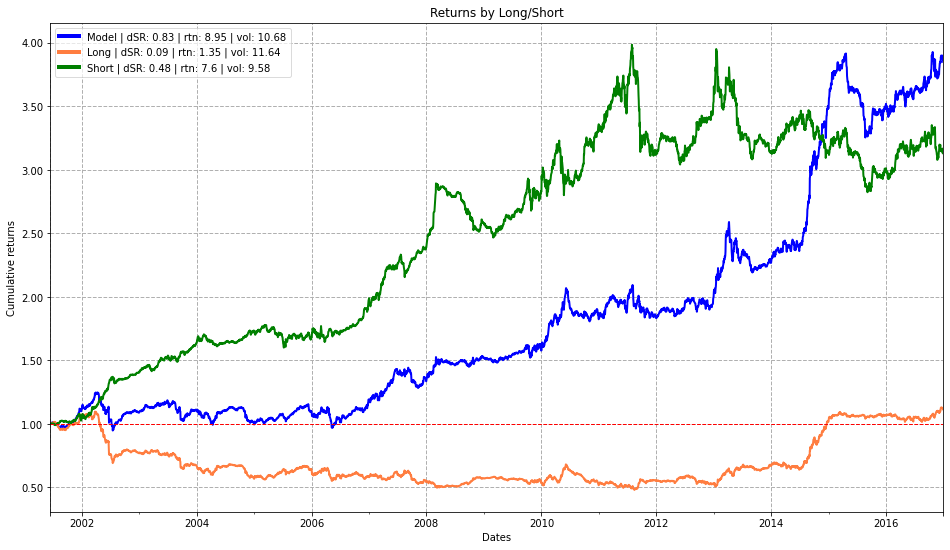

ss


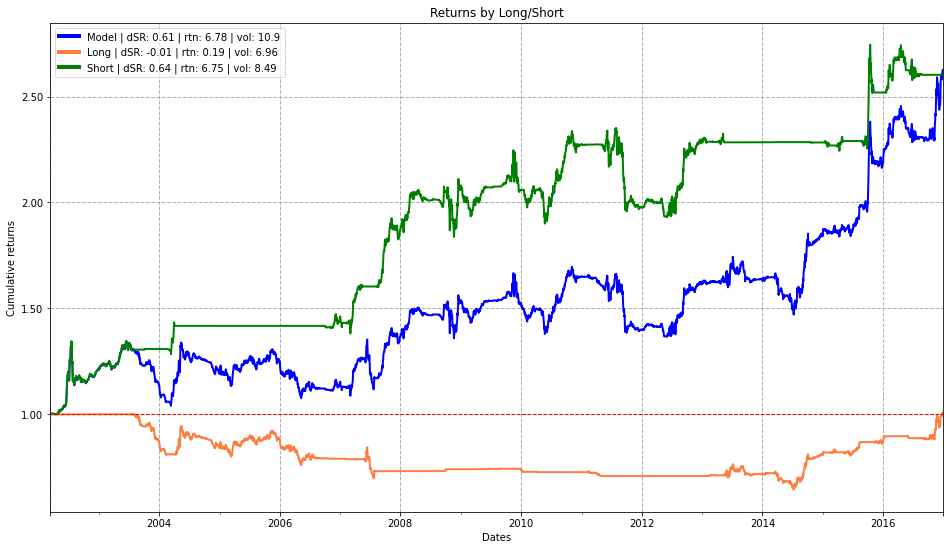

cs


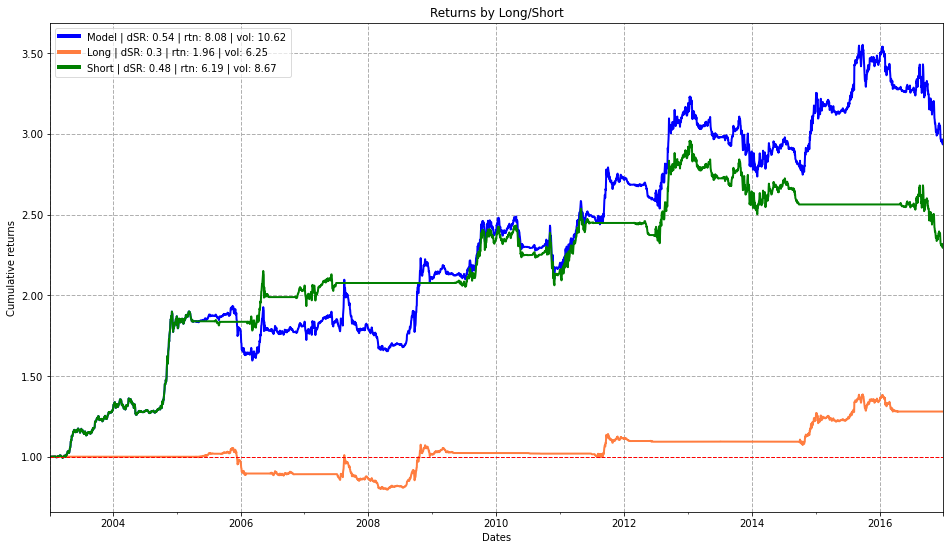

fsb


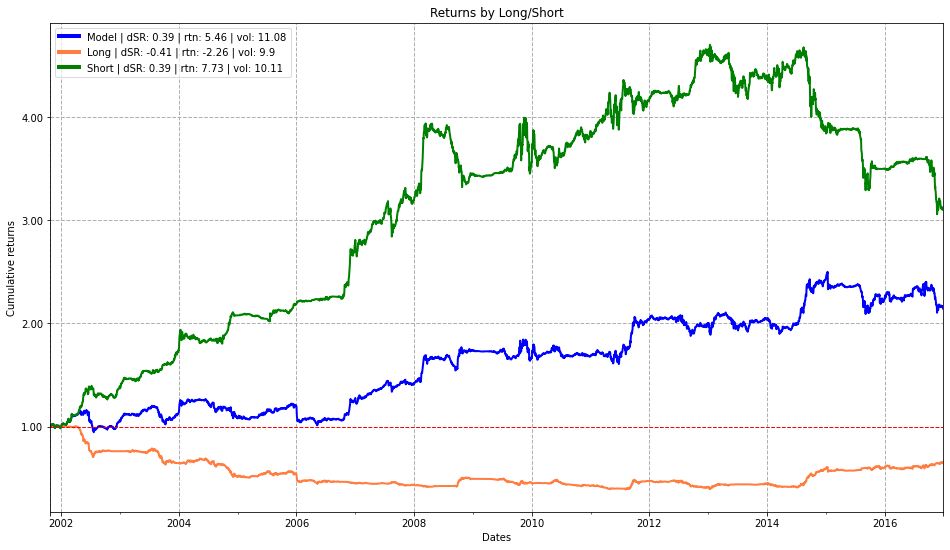

rx


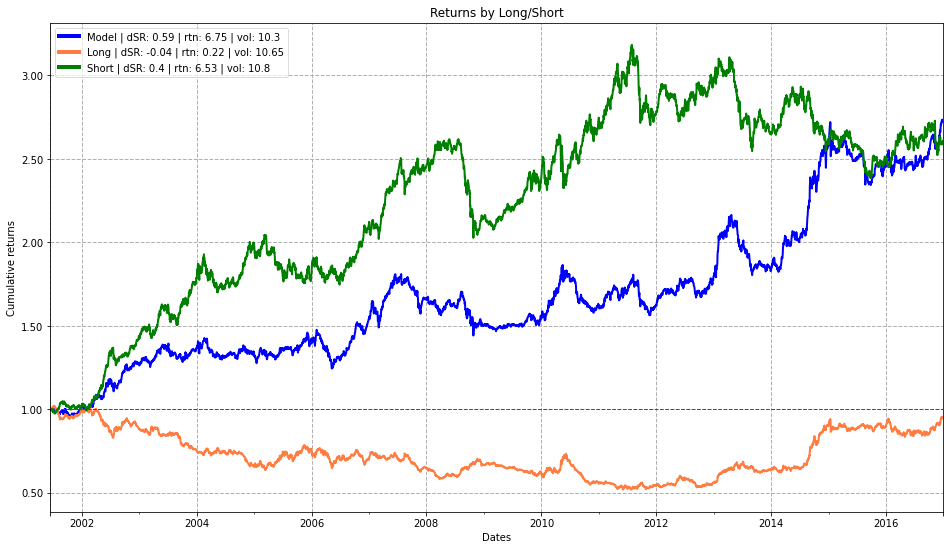

sgv


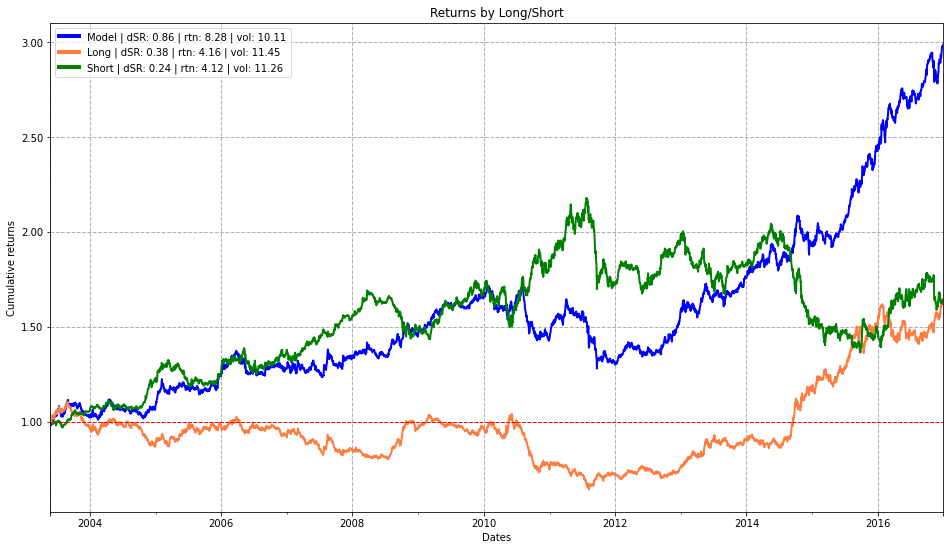

In [9]:
for a,b in zip(bt_list, bt_names):
  print(b)
  gen_rtn_longshort(a)
  plt.show()

# Cbt

In [8]:
combine_bt = CombinedBacktest(bt_list = bt_list,
                              bt_wts = [0.2, 0.2, 0.1, 0.2, 0.2, 0.1],
                              asset_returns = total_returns,
                              tcost = abs(total_returns*0),
                              settings = settings, method="naive",
                              settings_inject={"rebalance_period":"daily"})

Using `naive` method, `bt_wts` ignored


In [9]:
combine_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [10]:
get_summary(combine_bt)

Returns   : 0.15510180825270492
Vol       : 0.12093481484400366
SR        : 1.2825240477919777
Max DD    : -31.71

C Returns : 0.1591964322299286
C SR      : 1.1930607134253164
C Max DD  : -28.73

Hit rate  : 0.547
W | N | L : 0.55 | 0.0 | 0.45
W/L Ratio : 1.21


In [92]:
get_returns_stats(combine_bt.asset_rtn, combine_bt.wts)

USDAUD      USDCAD      USDEUR      USDGBP  \
annualized_return     0.675787    0.266756    0.989446    0.675579   
sharpe                0.795373    0.297502    0.662247     0.55214   
dollar_sharpe         0.785624    0.289037    0.663896    0.551198   
trade_sharpe          0.795373    0.297502    0.662247     0.55214   
long_sharpe           1.054283    0.219214    0.823697    1.605091   
short_sharpe          0.794435    0.395702    -0.07855     0.30715   
sortino                0.44307    0.165228    0.514907    0.322796   
max_drawdown         -1.386176   -4.187547   -3.076334   -4.102303   
max_drawdown_start  2009-11-16  2011-04-29  2010-06-07  2009-11-16   
max_drawdown_end    2009-12-22  2014-06-04  2014-02-28  2010-05-18   

                        USDJPY      USDNZD      USDSEK      USDNOK  \
annualized_return     0.882411    0.468744    0.543642    0.159828   
sharpe                0.709932    0.681989    0.663277    0.178864   
dollar_sharpe         0.714495    0.670849    0.661343    0.172611   
trade_sharpe          0.709932    0.681989    0.663277    0.178864   
long_sharpe           0.874844    0.740954    0.738797   -0.080553   
short_sharpe         -0.004921     0.72411       0.645    0.353893   
sortino               0.445306    0.393146    0.391779     0.09898   
max_drawdown          -2.51848   -1.591807   -3.354031   -3.721456   
max_drawdown_start  2007-06-22  2009-10-21  2005-11-16  2003-07-15   
max_drawdown_end    2010-12-31  2010-05-26  2007-11-26  2012-07-06   

                        USDCHF      USDSGD      USDTHB      USDTWD  \
annualized_return     0.437347    -0.62198    2.132822    -0.93872   
sharpe                0.242783   -0.211417    0.483951   -0.165931   
dollar_sharpe         0.236222   -0.225134    0.418643   -0.230208   
trade_sharpe          0.242783   -0.211417    0.483951   -0.165931   
long_sharpe           0.290288   -0.217906   -1.623302   -0.295504   
short_sharpe         -0.801416   -0.264107    1.153084    0.860104   
sortino               0.125623   -0.109843    0.262868    -0.07351   
max_drawdown         -4.196843  -16.751996  -28.700946  -46.559662   
max_drawdown_start  2010-06-07  2002-03-26  2009-09-29  2002-04-12   
max_drawdown_end    2011-08-09  2011-08-16  2011-06-28  2003-09-23   

                        USDKRW      USDPHP      USDINR      USDIDR  \
annualized_return     0.502885    1.921537    2.024185    0.953019   
sharpe                0.341262    0.858794    0.696914    0.333656   
dollar_sharpe         0.329695    0.821736    0.625345    0.307058   
trade_sharpe          0.341262    0.858794    0.696914    0.333656   
long_sharpe             0.0407    0.346562   -0.210931    0.410702   
short_sharpe          0.547294    1.078065     0.85312    0.380555   
sortino               0.181854      0.4814    0.389622    0.149227   
max_drawdown         -6.081259   -5.145353  -10.848343   -6.111681   
max_drawdown_start  2013-01-14  2005-05-05  2011-08-01  2011-06-07   
max_drawdown_end    2013-07-05  2005-07-05  2013-09-03  2015-09-28   

                        USDMYR      USDCNH  
annualized_return     0.538654     1.88843  
sharpe                0.344358    0.573738  
dollar_sharpe          0.33661    0.510851  
trade_sharpe          0.344358    0.573738  
long_sharpe            0.53351   -0.071644  
short_sharpe           0.36684     1.55021  
sortino                0.17209    0.215554  
max_drawdown         -4.812818  -14.197911  
max_drawdown_start  2006-12-27  2012-11-14  
max_drawdown_end    2007-05-22  2014-05-06

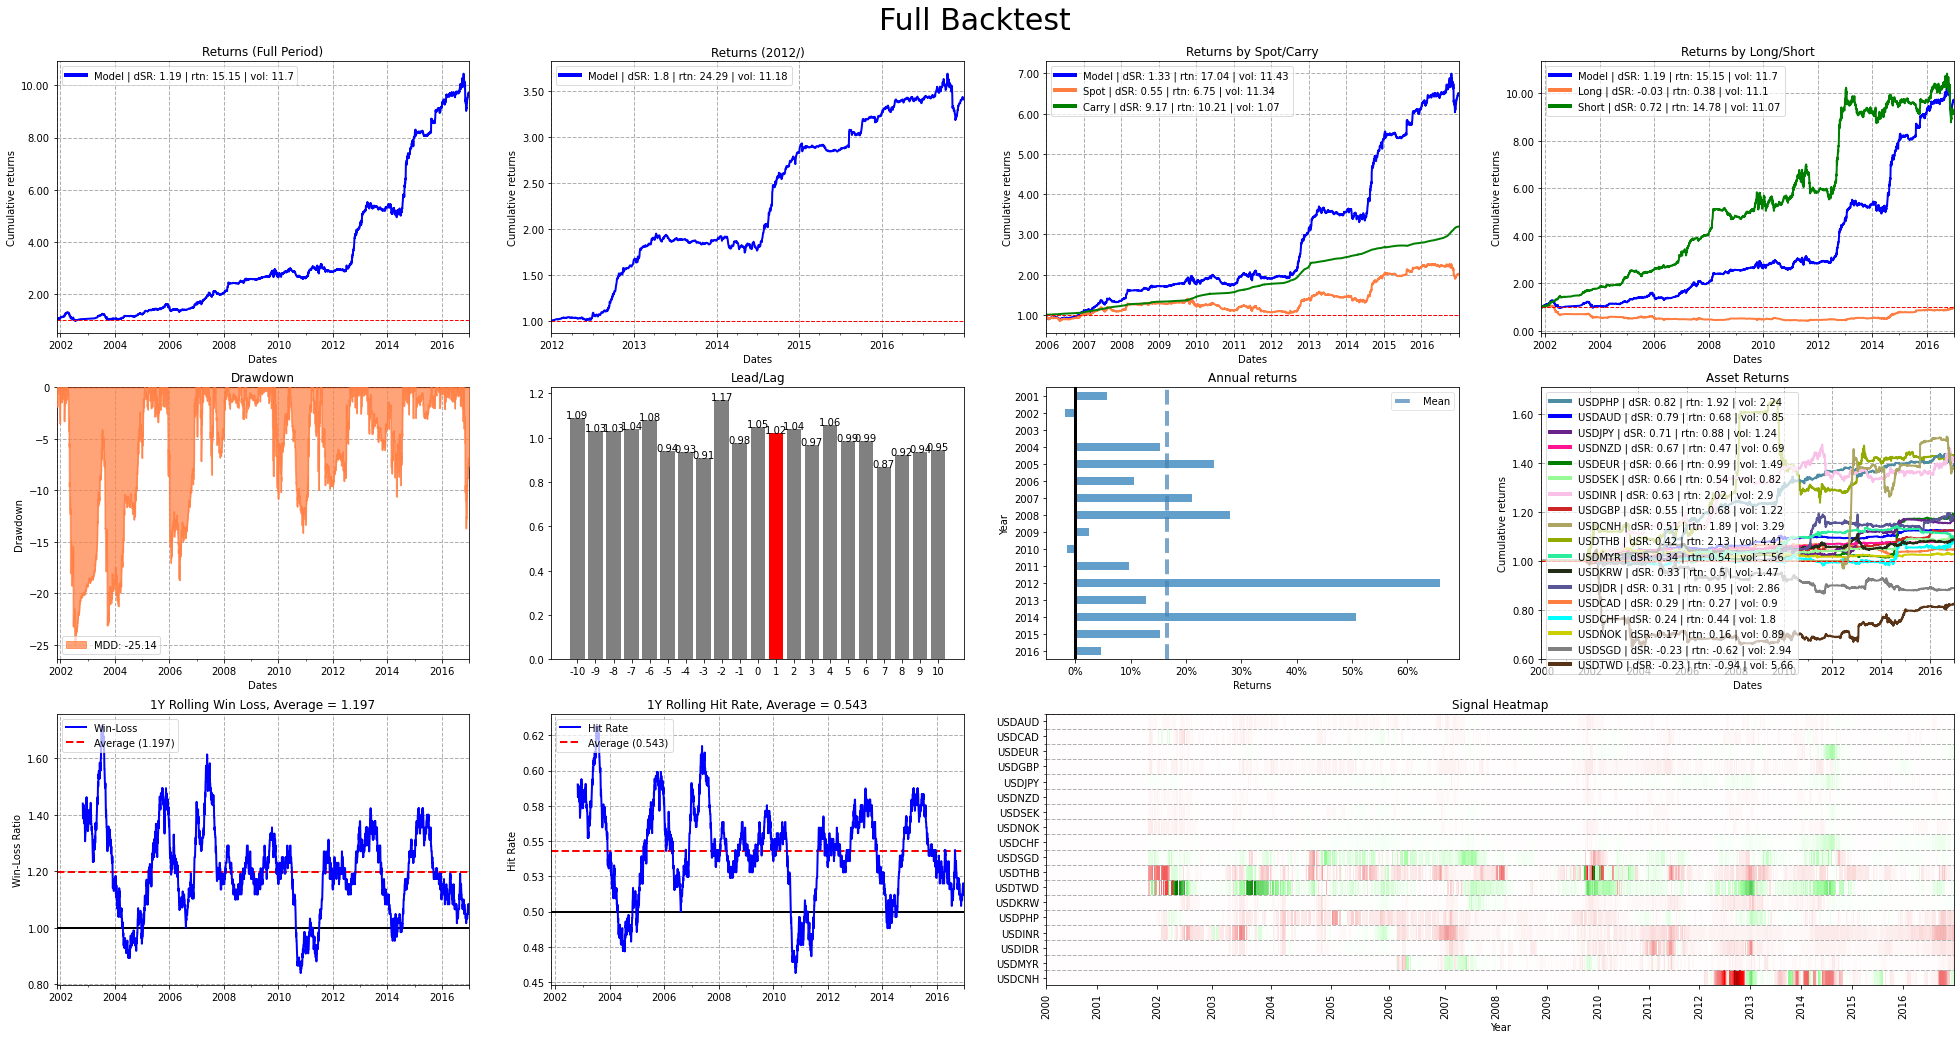

In [93]:
plot_bt(combine_bt)

<AxesSubplot:xlabel='Dates', ylabel='Cumulative returns'>

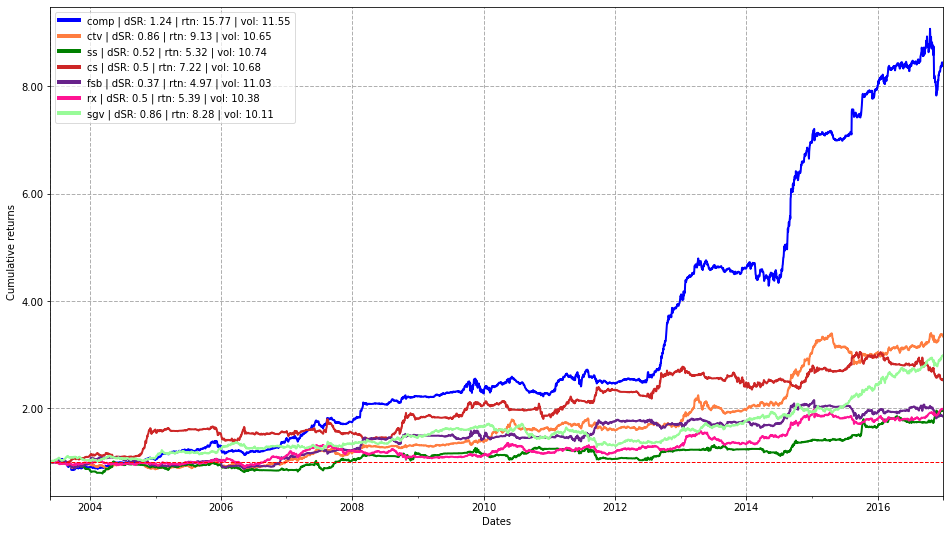

In [94]:
fin = pd.concat([x.model_rtn for x in [combine_bt] + bt_list], axis=1)
fin.columns = ["comp"] + bt_names
gen_plot_rtn(fin)

# Linreg

In [ ]:
### Try using LASSO

In [11]:
import statsmodels.api as sm
from statsmodels.regression.rolling import RollingOLS

In [12]:
store = []
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([total_returns.pipe(fill_date)[col]]+[x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  tor.columns = ["y", "x1", "x2", "x3", "x4", "x5", "x6"]
  tor = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
  
  endog = tor.y
  exog = sm.add_constant(tor[["x1", "x2", "x3", "x4", "x5", "x6"]])
  rols = RollingOLS(endog, exog, window=252)
  rres = rols.fit()
  params = rres.params.copy()
  params.index = np.arange(1, params.shape[0] + 1)
  
  rr = params[["x1", "x2", "x3", "x4", "x5", "x6"]]
  rr = rr.pipe(omit_leading_na)
  ss = tor[["x1", "x2", "x3", "x4", "x5", "x6"]].iloc[rr.index[0]-1:]
  rr.index = ss.index

  tt = params.const.pipe(omit_leading_na)
  tt.index = ss.index
  
  sig = (rr.mul(ss,1).sum(1) + tt)
  store.append(sig)

C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)
C:\Users\vin_s\AppData\Local\Programs\Python\Python39\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x

In [13]:
lr_sig = pd.concat(store, axis=1)
lr_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

<AxesSubplot:xlabel='Dates'>

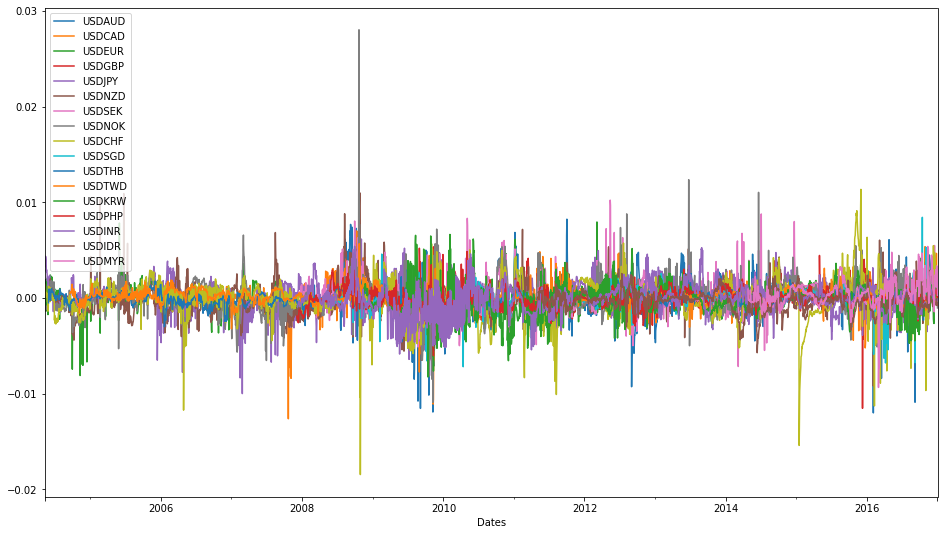

In [14]:
lr_sig.plot()

In [15]:
lr_bt = Backtest(signal = lr_sig, asset_returns = total_returns.drop("USDCNH", 1), tcost = abs(total_returns*0), settings = settings)
lr_bt.run()

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


C:\Users\vin_s\AppData\Local\Temp/ipykernel_50988/2382986942.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  lr_bt = Backtest(signal = lr_sig, asset_returns = total_returns.drop("USDCNH", 1), tcost = abs(total_returns*0), settings = settings)


In [16]:
get_summary(lr_bt)

Returns   : 0.051716548076147485
Vol       : 0.11150718054025982
SR        : 0.4637956750908535
Max DD    : -20.82

C Returns : 0.04655085362230025
C SR      : 0.37034538154417845
C Max DD  : -19.26

Hit rate  : 0.523
W | N | L : 0.52 | 0.0 | 0.48
W/L Ratio : 1.1


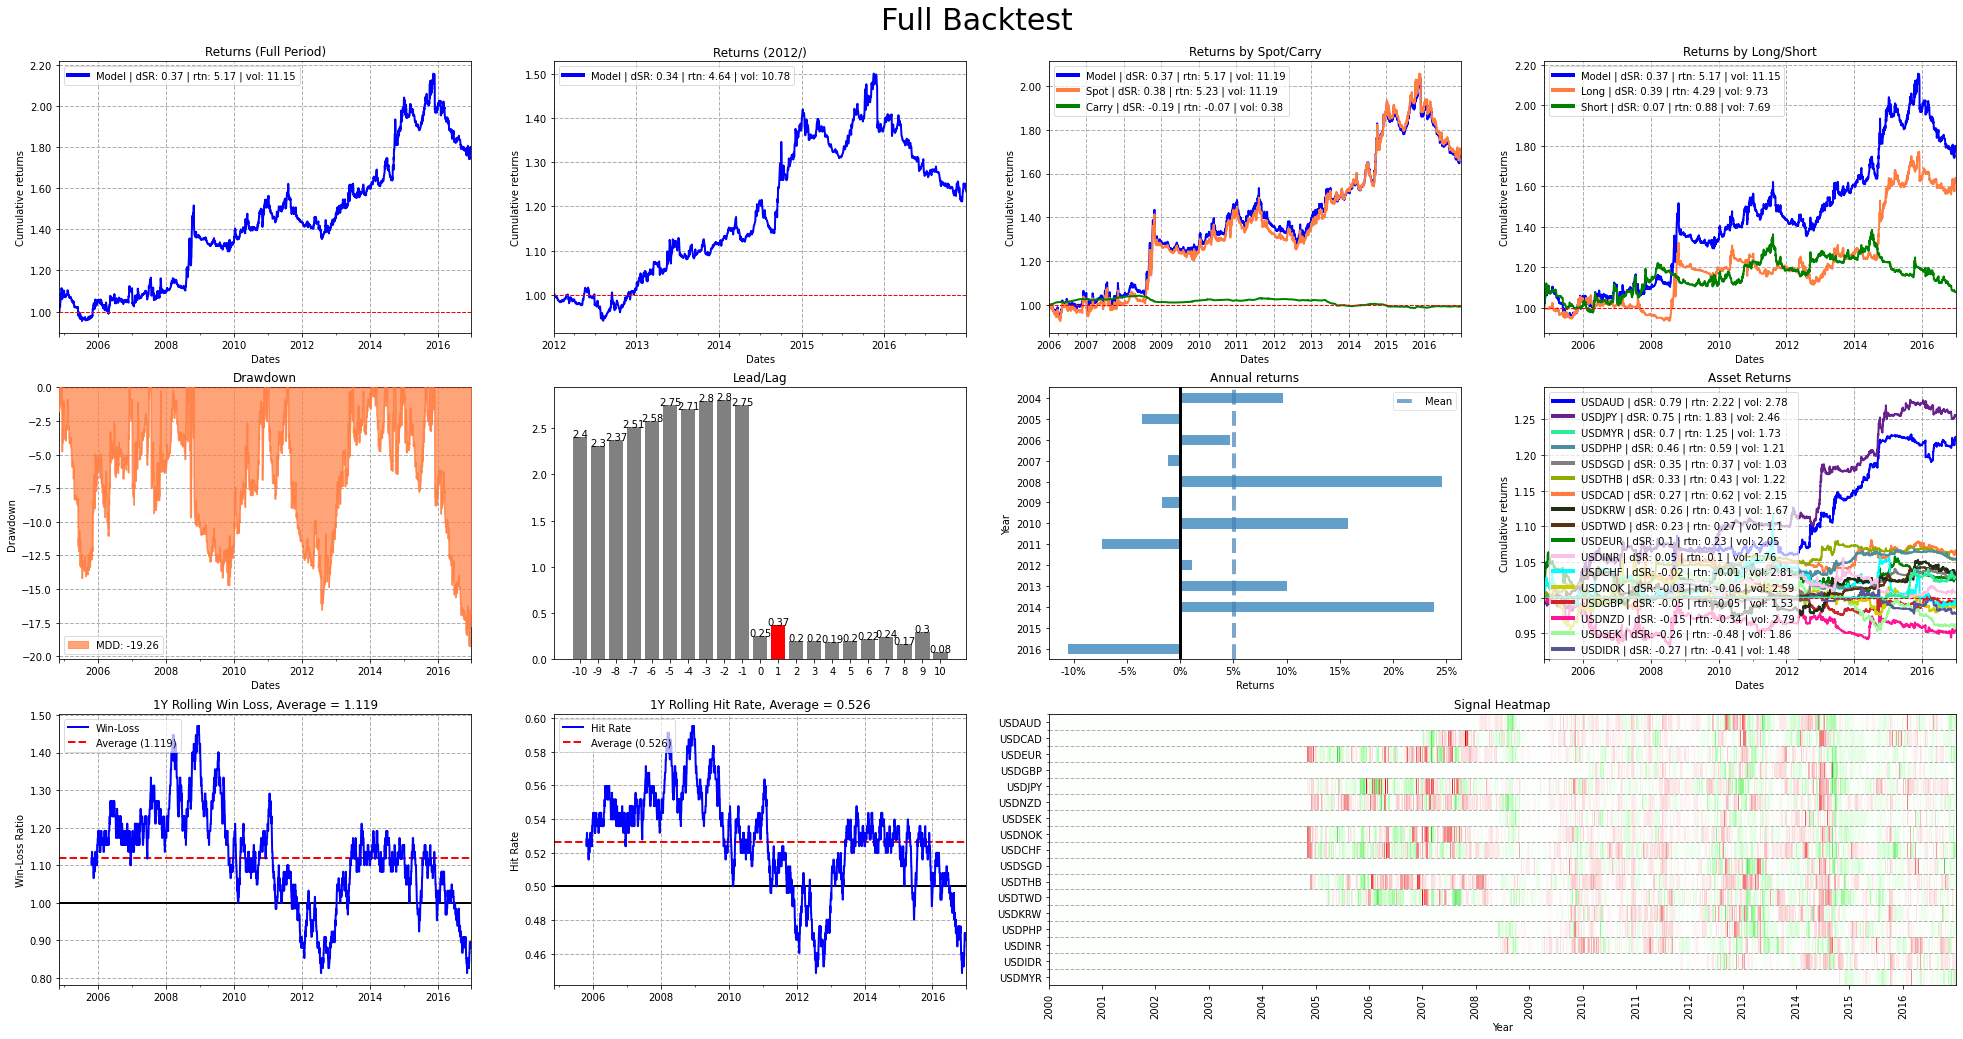

In [17]:
plot_bt(lr_bt)

# PCA

In [18]:
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  tor.columns = ["x1", "x2", "x3", "x4", "x5", "x6"]
  input_data = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
  input_data.to_csv("Signals/{}.csv".format(col), index=False)

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.13125796631335807
Vol       : 0.110940907279458
SR        : 1.1831340623772058
Max DD    : -14.93

C Returns : 0.1332501588447164
C SR      : 0.9039146949259513
C Max DD  : -14.09

Hit rate  : 0.526
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.11


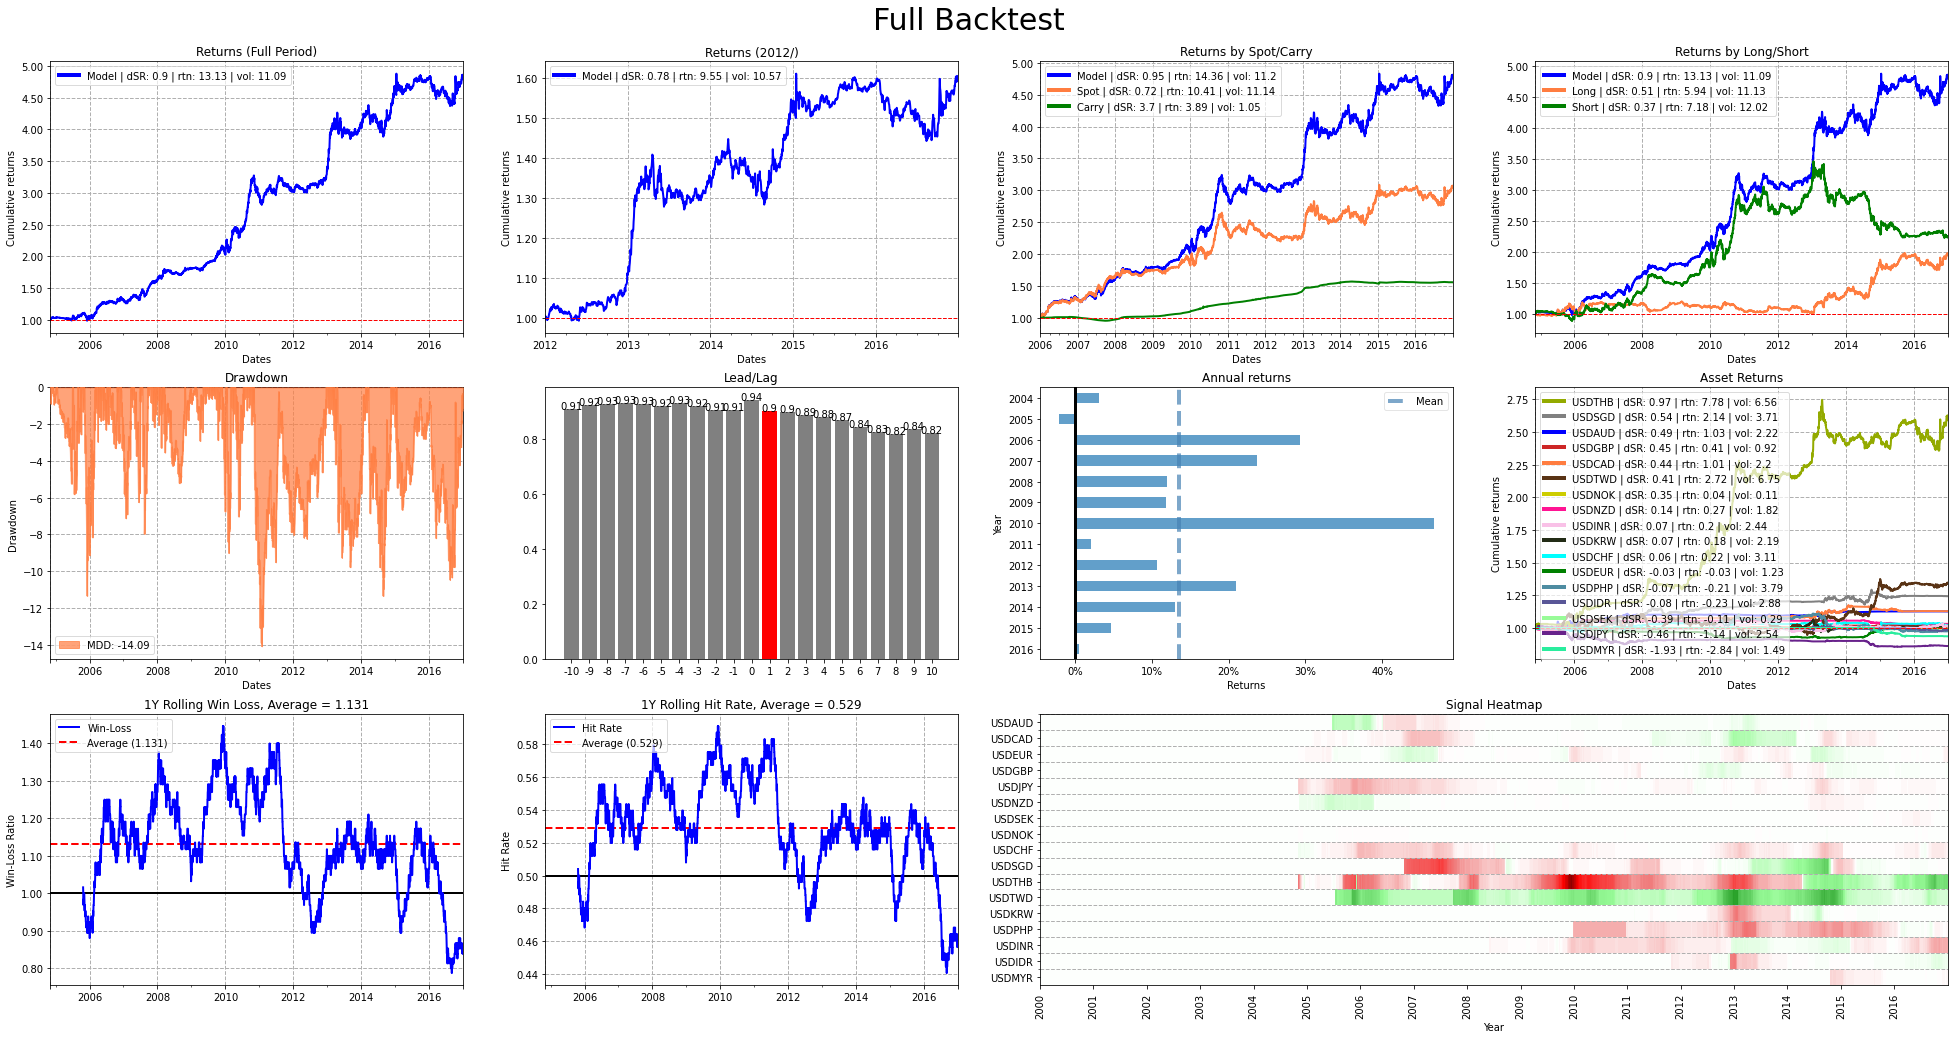

In [19]:
new_store1=[]
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  loadings = pd.read_csv("PC1/"+col+".csv")
  loadings.index = tor.tail(loadings.shape[0]).index
  new_store1.append(loadings.iloc[:,0])
pc1_sig = pd.concat(new_store1,axis=1)
pc1_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

scaled_sig = (pc1_sig*-1)*(0.1/rolling_vol(spot_returns.drop("USDCNH",axis=1), 252))

pc1_bt = Backtest(signal = scaled_sig, 
                  asset_returns = total_returns.drop("USDCNH",axis=1), 
                  tcost = abs(total_returns*0), settings = settings)
pc1_bt.run()

get_summary(pc1_bt)

plot_bt(pc1_bt)

Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]
Returns   : 0.0837201573474603
Vol       : 0.10854211119548884
SR        : 0.7713149894115918
Max DD    : -19.08

C Returns : 0.08094634915700766
C SR      : 0.632806613146934
C Max DD  : -17.72

Hit rate  : 0.512
W | N | L : 0.51 | 0.0 | 0.49
W/L Ratio : 1.05


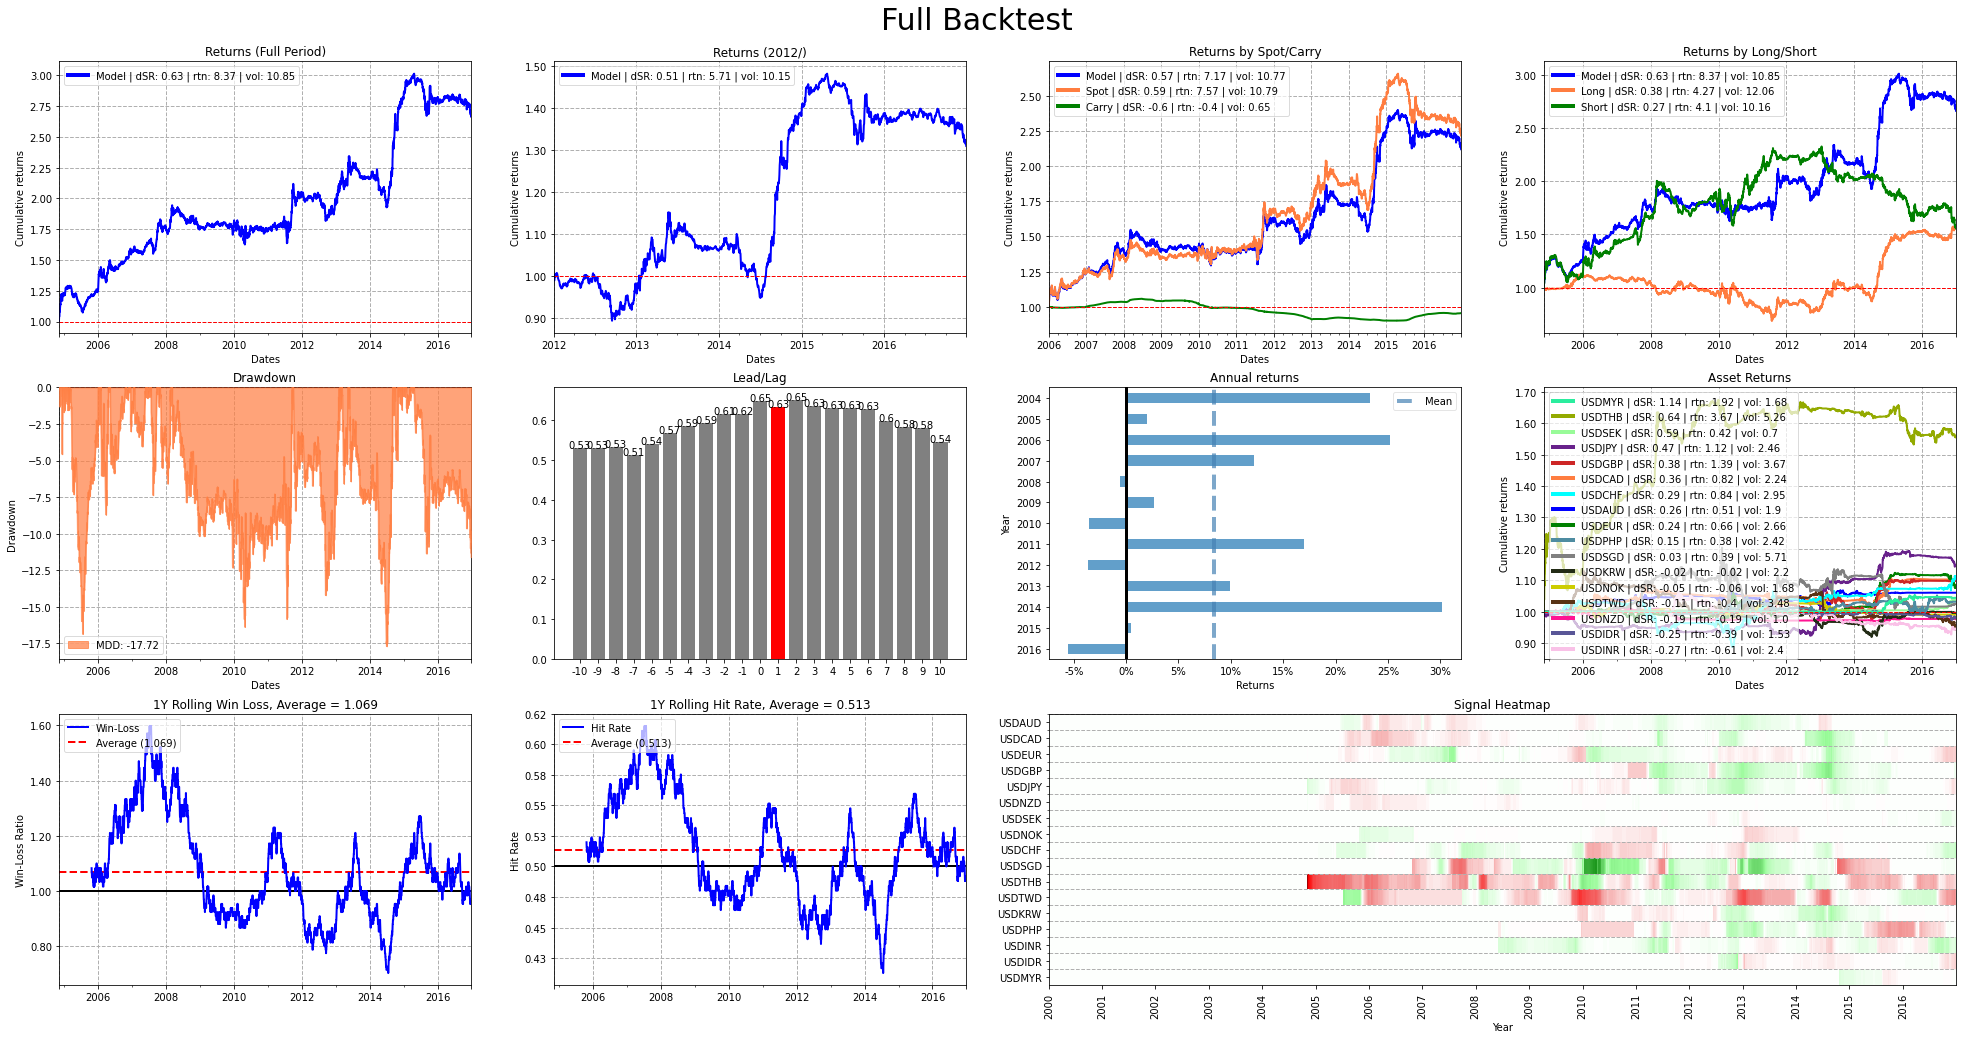

In [20]:
new_store2=[]
for col in list(total_returns):
  if col == "USDCNH":
    continue
  tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
  loadings = pd.read_csv("PC2/"+col+".csv")
  loadings.index = tor.tail(loadings.shape[0]).index
  new_store2.append(loadings.iloc[:,0])
  
pc2_sig = pd.concat(new_store2, axis=1)
pc2_sig.columns = [x for x in list(total_returns) if x != "USDCNH"]

scaled_sig = (pc2_sig*-1)*(0.1/rolling_vol(spot_returns.drop("USDCNH",axis=1), 252))

pc2_bt = Backtest(signal = scaled_sig, 
                  asset_returns = total_returns.drop("USDCNH",axis=1), 
                  tcost = abs(total_returns*0), settings = settings)
pc2_bt.run()

get_summary(pc2_bt)

plot_bt(pc2_bt)

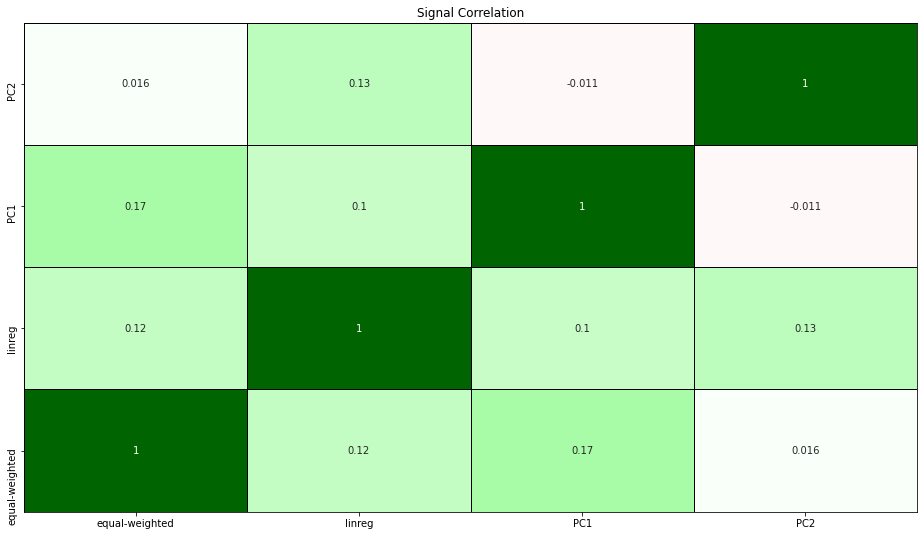

In [21]:
cbt_corrplot([combine_bt, lr_bt, pc1_bt, pc2_bt], ["equal-weighted", "linreg", "PC1", "PC2"])

<AxesSubplot:title={'center':'Signal Rolling Correlation'}, xlabel='Dates', ylabel='Correlation'>

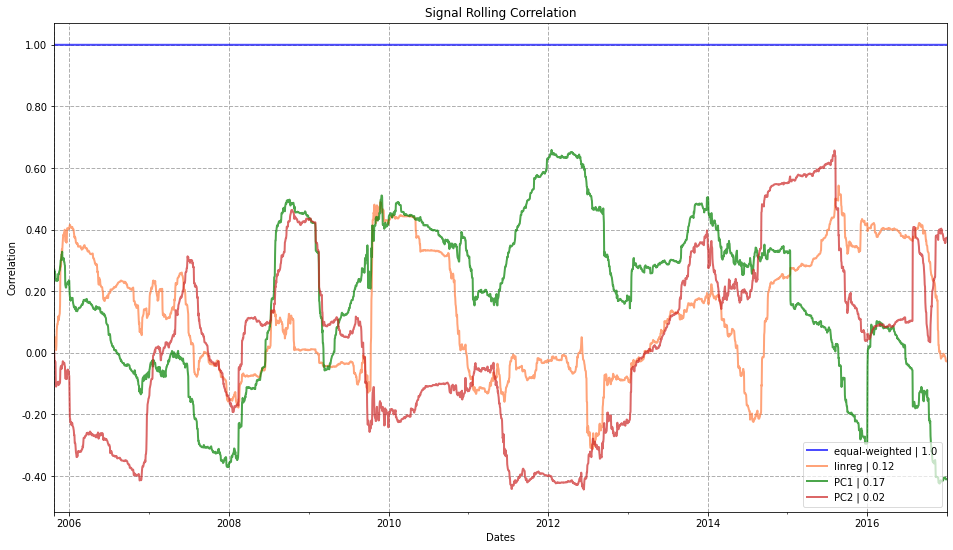

In [22]:
cbt_rolling_cor([combine_bt, lr_bt, pc1_bt, pc2_bt], ["equal-weighted", "linreg", "PC1", "PC2"])

In [44]:
cbt = CombinedBacktest(bt_list = [lr_bt, pc1_bt, pc2_bt],
                        bt_wts = [0.2, 0.2, 0.2],
                        asset_returns = total_returns.drop("USDCNH",axis=1),
                        tcost = abs(total_returns.drop("USDCNH",axis=1)*0),
                        settings = settings, method="naive",
                        settings_inject={"rebalance_period":"daily"})
cbt.run()

Using `naive` method, `bt_wts` ignored
Re-arranging asset columns
Asset scaling ...
Portfolio scaling ...
    Grouping by [ALL]


In [45]:
get_summary(cbt)

Returns   : 0.15890450205723153
Vol       : 0.11054893591494715
SR        : 1.4374132210506994
Max DD    : -18.1

C Returns : 0.1650714136217775
C SR      : 1.0441515598704794
C Max DD  : -16.82

Hit rate  : 0.526
W | N | L : 0.53 | 0.0 | 0.47
W/L Ratio : 1.11


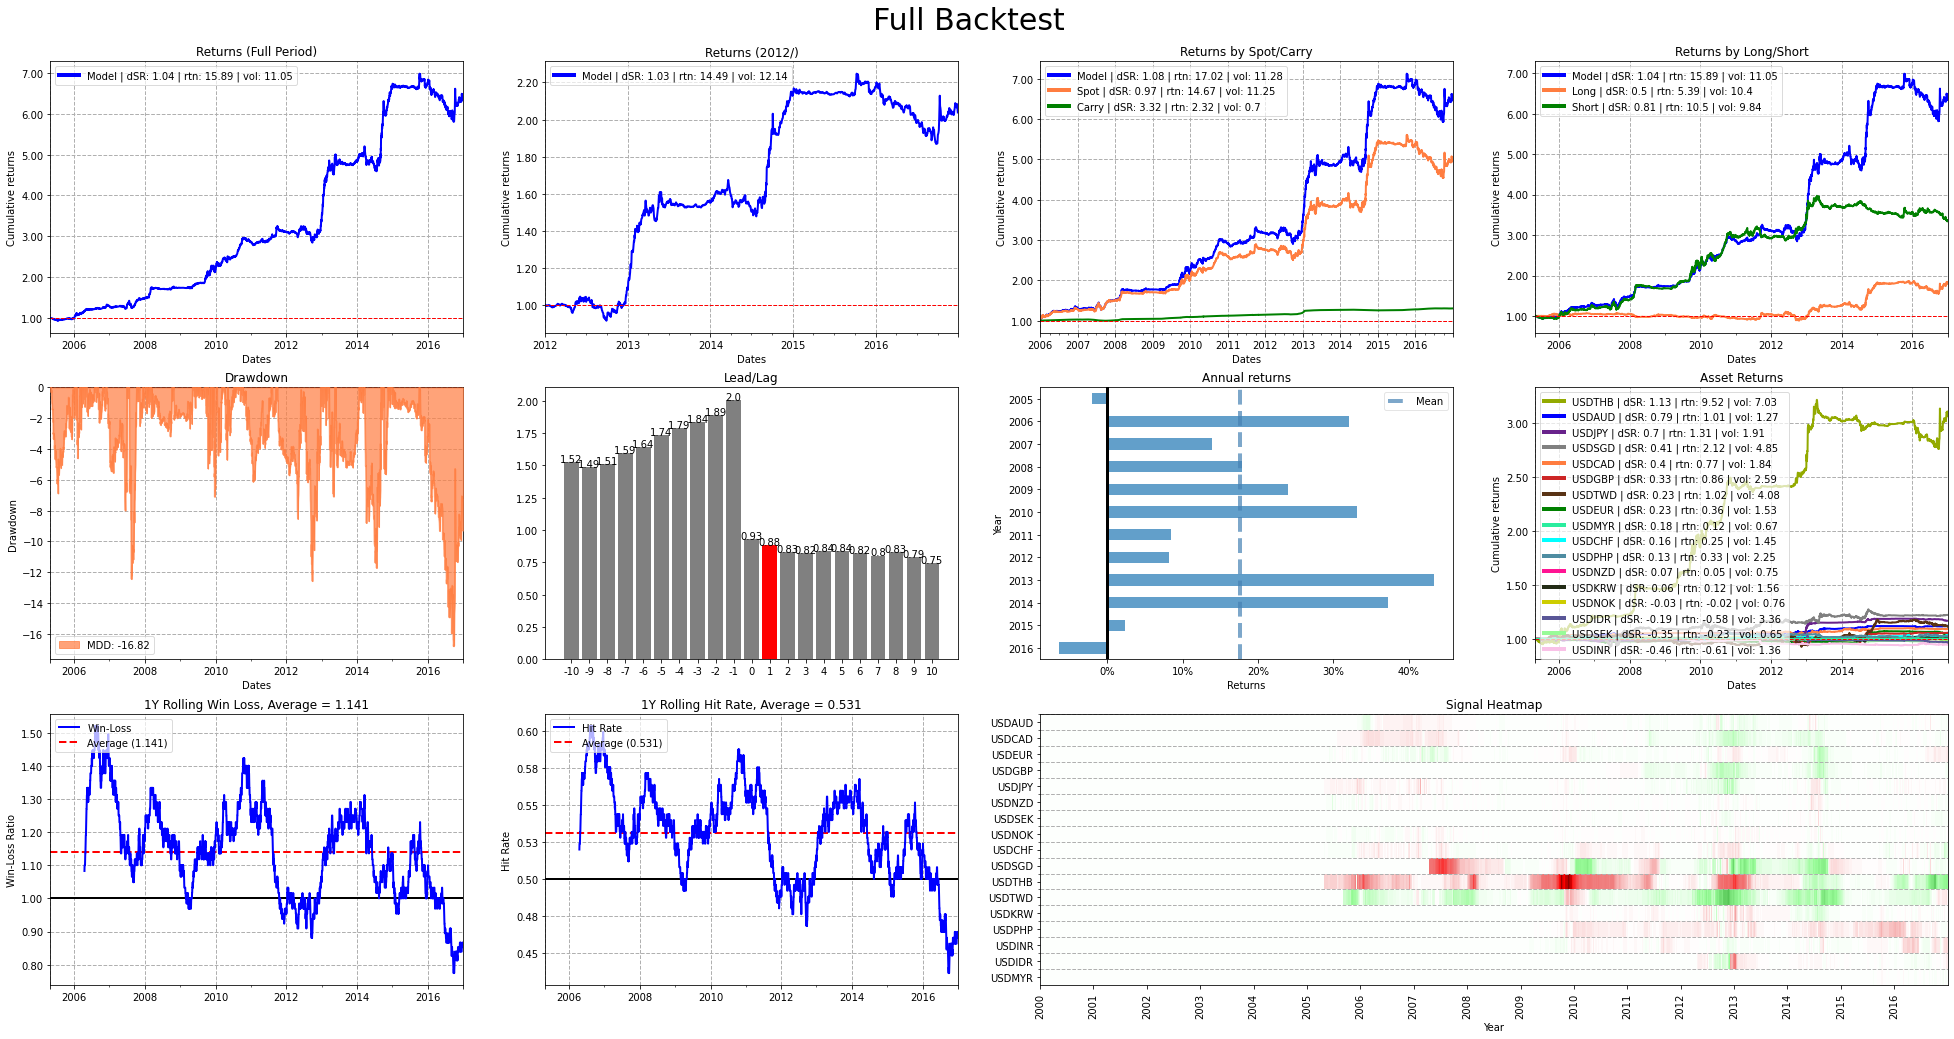

In [46]:
plot_bt(cbt)

In [47]:
sig = cbt.wts.copy()
sig["USDTHB"] = 0

daily_bt = Backtest(signal = sig, 
                    asset_returns = total_returns.drop("USDCNH",axis=1), 
                    tcost = abs(total_returns.drop("USDCNH",axis=1)*0), 
                    settings = settings, settings_inject={"asset_scaling_target":None})
daily_bt.run()

Re-arranging asset columns
Portfolio scaling ...
    Grouping by [ALL]


In [48]:
get_summary(daily_bt)

Returns   : 0.06610062500296708
Vol       : 0.11044351805994959
SR        : 0.5985016247588849
Max DD    : -20.26

C Returns : 0.0618461853983068
C SR      : 0.503419457125559
C Max DD  : -18.97

Hit rate  : 0.513
W | N | L : 0.51 | 0.0 | 0.49
W/L Ratio : 1.05


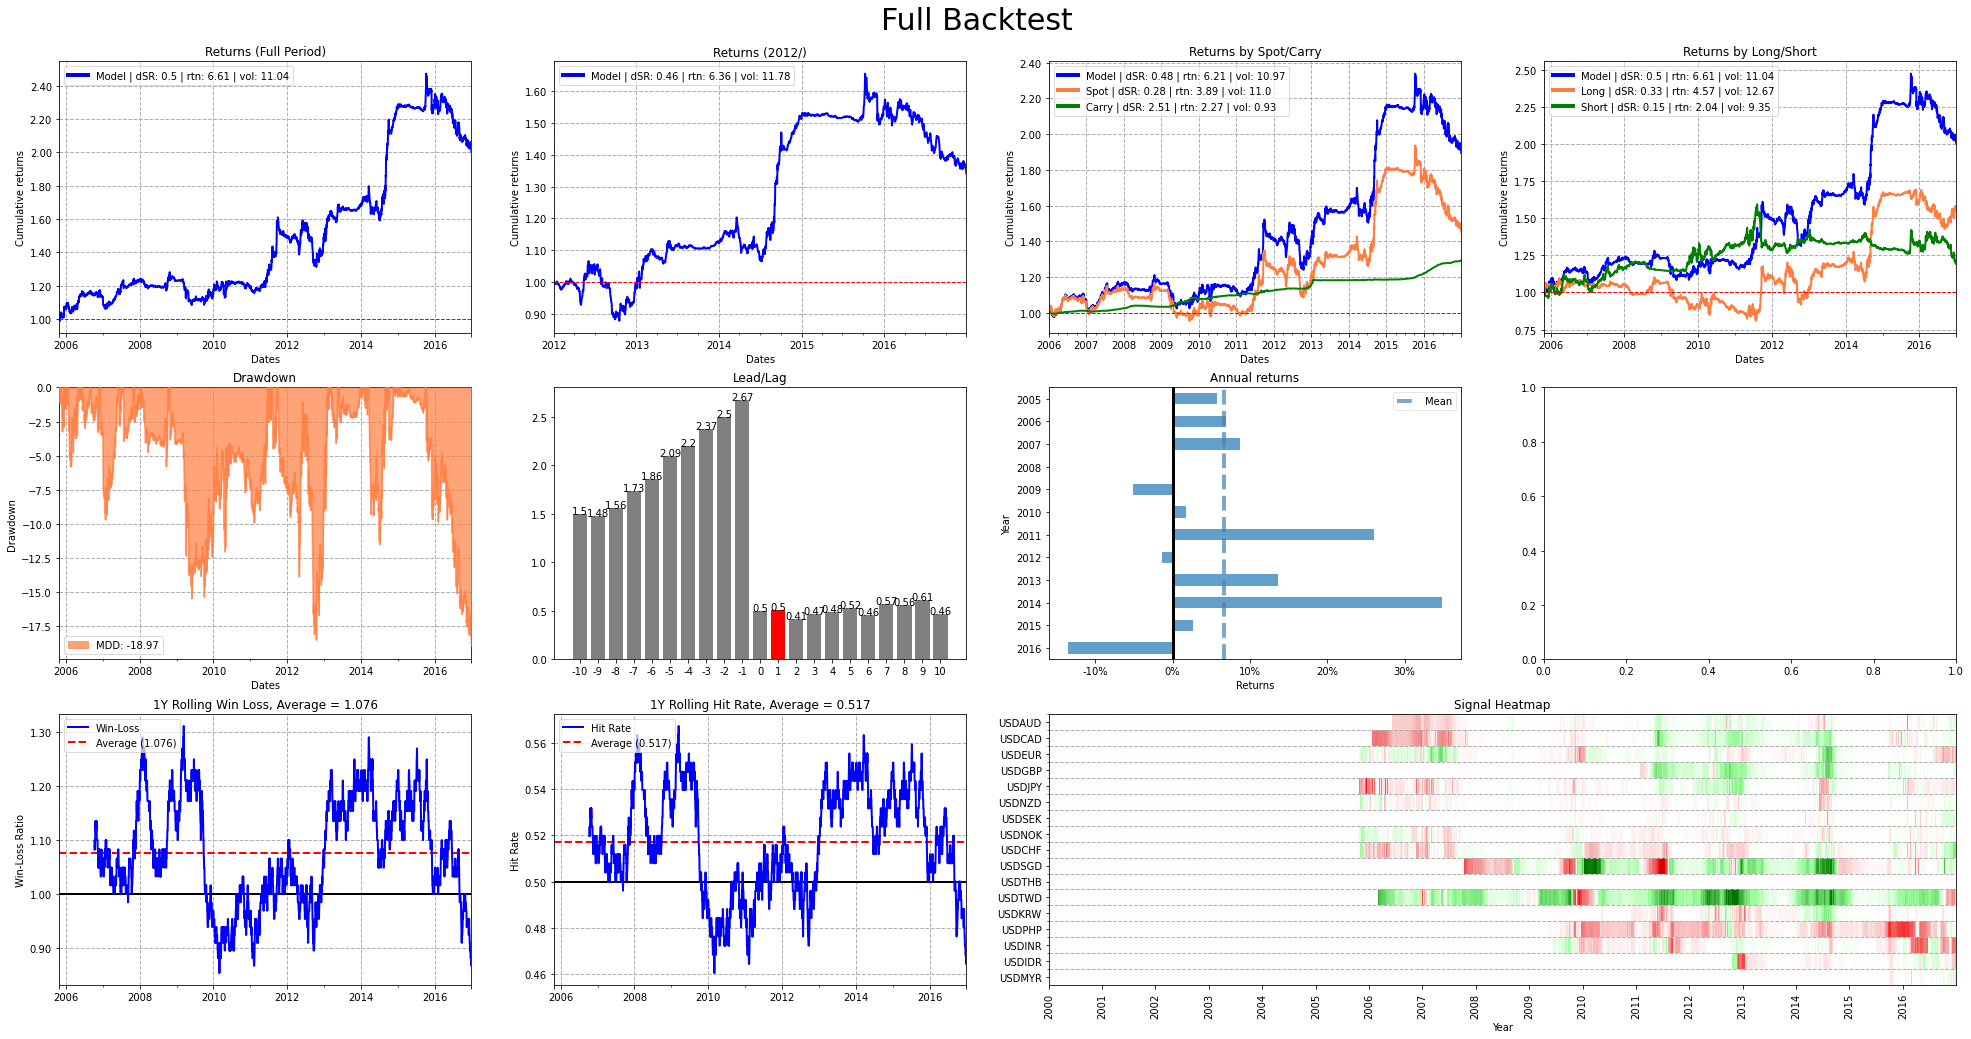

In [49]:
plot_bt(daily_bt)

In [ ]:
# from sklearn.decomposition import PCA
# store = []
# for col in list(total_returns):
#   if col == "USDCNH":
#     continue
#   tor = pd.concat([x.wts.pipe(fill_date)[col] for x in bt_list], axis=1)
#   tor.columns = ["x1", "x2", "x3", "x4", "x5", "x6"]
#   input_data = tor.pipe(omit_leading_na).pipe(omit_trailing_na)
#   break
#   window = 252
#   df_new = pd.DataFrame(np.zeros((input_data.shape[0] - window + 1, input_data.shape[1])) )

#   def rolling_pca(window_data):
#     main = input_data.iloc[window_data]
#     main = main.dropna(axis=0, how="all").dropna(axis=1, how="any")

#     main = PCA().fit(main)
#     df_new.iloc[int(window_data.iloc[0])] = main.components_[:,0]

#     return True
#   df_idx = pd.DataFrame(np.arange(input_data.shape[0]))
#   _ = df_idx.rolling(window).apply(rolling_pca)
#   store.append(df_new)

# new_store = []
# for dt in store:
#   a = dt.copy()
#   d = abs(a.iloc[1:] - a.shift(1).iloc[1:]).sum(1)
#   d1 = abs(a.iloc[1:] + a.shift(1).iloc[1:]).sum(1)
#   signs = pd.concat([pd.Series(1), (pd.Series(-1,index=a.index[1:]) ** (d1 <= d)).cumprod()])
#   signs.index = signs.index
#   res = a.mul(signs, 0)

#   dtc = res.copy()
#   dtc.index = tor.tail(dtc.shape[0]).index
#   new_store.append(dtc.iloc[:,0])